Импортируем библиотеки

In [198]:
import numpy as np
import pandas as pd

Загружаем данные
Мы взяли данные о продажах магазина электроники за 12 месяцев(у нас пока нет месяца июня, т.к. возникли проблемы с обработкой, все эти данные, в т.ч. числовые имели тип object и мы переводили их в int, но именно с месяцем июнь у нас возникла проблема, надеемся, что скоро устраним)

In [199]:
jan= pd.read_csv('Sales_January_2019.csv', sep=(';'))
feb=pd.read_csv('Sales_February_2019.csv', sep=(';'))
mar=pd.read_csv('Sales_March_2019.csv',sep=(';'))
apr=pd.read_csv('Sales_April_2019.csv', sep=(';'))
may=pd.read_csv('Sales_May_2019.csv', sep=";")
jul=pd.read_csv('Sales_July_2019.csv', sep=";")
aug=pd.read_csv('Sales_August_2019.csv', sep=';')
sep = pd.read_csv('Sales_September_2019.csv', sep=";")
oct = pd.read_csv('Sales_October_2019.csv', sep=";")
nov = pd.read_csv('Sales_November_2019.csv', sep=";")
dec = pd.read_csv('Sales_December_2019.csv', sep=";")

Давайте посмотрим на наши данные

In [200]:
dec

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665.0,Macbook Pro Laptop,1.0,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


Price Each имеет тип object, изменим его на float

In [201]:
jan['Price Each'] = pd.to_numeric(jan['Price Each'], errors='coerce')
feb['Price Each'] = pd.to_numeric(feb['Price Each'], errors='coerce')
mar['Price Each'] = pd.to_numeric(mar['Price Each'], errors='coerce')
apr['Price Each'] = pd.to_numeric(apr['Price Each'], errors='coerce')
may['Price Each'] = pd.to_numeric(may['Price Each'], errors='coerce')
jul['Price Each'] = pd.to_numeric(jul['Price Each'], errors='coerce')
aug['Price Each'] = pd.to_numeric(aug['Price Each'], errors='coerce')
sep['Price Each'] = pd.to_numeric(sep['Price Each'], errors='coerce')
oct['Price Each'] = pd.to_numeric(oct['Price Each'], errors='coerce')
nov['Price Each'] = pd.to_numeric(nov['Price Each'], errors='coerce')
dec['Price Each'] = pd.to_numeric(dec['Price Each'], errors='coerce')

In [202]:
nov.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

Заменим пустые строки на NaN и затем удалим эти строки(т.к. в таблице есть строки, в которых отсутсвует какая либо информация, в т.ч. нет Order ID)

In [203]:
jan.replace('', np.nan, inplace=True)
JAN=jan.dropna()
feb.replace('', np.nan, inplace=True)
FEB=feb.dropna()
mar.replace('', np.nan, inplace=True)
MAR=mar.dropna()
apr.replace('', np.nan, inplace=True)
APR=apr.dropna()
may.replace('', np.nan, inplace=True)
MAY=may.dropna()
jul.replace('', np.nan, inplace=True)
JUL=jul.dropna()
aug.replace('', np.nan, inplace=True)
AUG=aug.dropna()
sep.replace('', np.nan, inplace=True)
SEP = sep.dropna()
oct.replace('', np.nan, inplace=True)
OCT = oct.dropna()
nov.replace('', np.nan, inplace=True)
NOV = nov.dropna()
dec.replace('', np.nan, inplace=True)
DEC = dec.dropna()

Убедимся, что нет пустых строк

In [204]:
NOV.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Найдем сколько было продано в каждом месяце и в каком месяце наибольшее, в каком наименьшее количество проданных электроник 

In [205]:
print('Продажи января:', JAN['Quantity Ordered'].sum())
print('Продажи февраля:', FEB['Quantity Ordered'].sum()) 
print('Продажи марта:', MAR['Quantity Ordered'].sum())
print('Продажи апреля:', APR['Quantity Ordered'].sum())
print('Продажи мая:', MAY['Quantity Ordered'].sum())
print('Продажи июля:', JUL['Quantity Ordered'].sum())
print('Продажи августа:', AUG['Quantity Ordered'].sum())
print('Продажи сентября:', SEP['Quantity Ordered'].sum())   
print('Продажи октября:', OCT['Quantity Ordered'].sum())    
print('Продажи ноября:', NOV['Quantity Ordered'].sum()) 
print('Продажи декабря:', DEC['Quantity Ordered'].sum()) 

Продажи января: 10868.0
Продажи февраля: 13461.0
Продажи марта: 17006.0
Продажи апреля: 20568.0
Продажи мая: 18657.0
Продажи июля: 16069.0
Продажи августа: 13442.0
Продажи сентября: 13119.0
Продажи октября: 22705.0
Продажи ноября: 19808.0
Продажи декабря: 28121.0


In [278]:
data = [JAN['Quantity Ordered'].sum(), FEB['Quantity Ordered'].sum(), MAR['Quantity Ordered'].sum(), APR['Quantity Ordered'].sum(), MAY['Quantity Ordered'].sum(), JUL['Quantity Ordered'].sum(), AUG['Quantity Ordered'].sum(), SEP['Quantity Ordered'].sum(), OCT['Quantity Ordered'].sum(), NOV['Quantity Ordered'].sum(), DEC['Quantity Ordered'].sum()] 
data = np.array(data)
df = pd.DataFrame(data, columns=['Количество продаж в каждом месяце'], index=["Январь", "Февраль", "Март", "Апрель", "Май", "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"])
df

,Количество продаж в каждом месяце
Январь,10868.0
Февраль,13461.0
Март,17006.0
Апрель,20568.0
Май,18657.0
Июль,16069.0
Август,13442.0
Сентябрь,13119.0
Октябрь,22705.0
Ноябрь,19808.0


<AxesSubplot:>

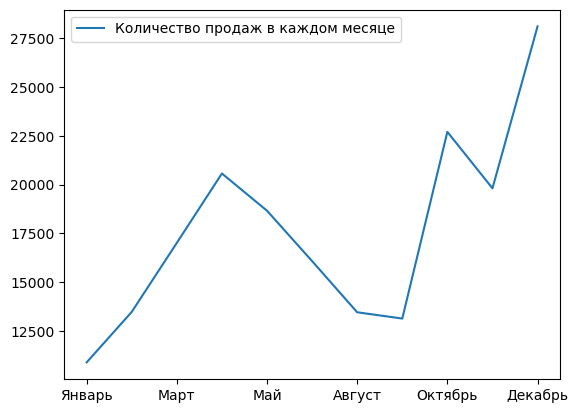

In [288]:
df.plot(column='Количество продаж в каждом месяце')

Cамое большое количество проданных продуктов в декабре, самое наименьшее - в январе.

Сосчитаем доходы от продажи электроник в каждом месяце и найдем наибольший и наименьший доходы.

In [208]:
income_jan = JAN['Quantity Ordered'] * JAN['Price Each']
income_feb = FEB['Quantity Ordered'] * FEB['Price Each']
income_mar = MAR['Quantity Ordered'] * MAR['Price Each']
income_apr = APR['Quantity Ordered'] * APR['Price Each']
income_may = MAY['Quantity Ordered'] * MAY['Price Each']
income_jul = JUL['Quantity Ordered'] * JUL['Price Each']
income_aug = AUG['Quantity Ordered'] * AUG['Price Each']
income_sep = SEP['Quantity Ordered'] * SEP['Price Each']
income_oct = OCT['Quantity Ordered'] * OCT['Price Each']
income_nov = NOV['Quantity Ordered'] * NOV['Price Each']
income_dec = DEC['Quantity Ordered'] * DEC['Price Each']
JAN['income'] = income_jan
FEB['income'] = income_feb
MAR['income'] = income_mar
APR['income'] = income_apr
MAY['income'] = income_may
JUL['income'] = income_jul
AUG['income'] = income_aug
SEP['income'] = income_sep
OCT['income'] = income_oct
NOV['income'] = income_nov
DEC['income'] = income_dec

C:\Users\User\AppData\Local\Temp\ipykernel_7004\3170221118.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JAN['income'] = income_jan
C:\Users\User\AppData\Local\Temp\ipykernel_7004\3170221118.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FEB['income'] = income_feb
C:\Users\User\AppData\Local\Temp\ipykernel_7004\3170221118.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [291]:
print('Суммарная доходность января:', JAN['income'].sum().round(1))
print('Суммарная доходность февраля:', FEB['income'].sum().round(1))
print('Суммарная доходность марта:', MAR['income'].sum().round(1))
print('Суммарная доходность апреля:', APR['income'].sum().round(1))
print('Суммарная доходность мая:', MAY['income'].sum().round(1))
print('Суммарная доходность июля:', JUL['income'].sum().round(1))
print('Суммарная доходность августа:', AUG['income'].sum().round(1))
print('Суммарная доходность сентября:', SEP['income'].sum().round(1))  
print('Суммарная доходность октября:', OCT['income'].sum().round(1))  
print('Суммарная доходность ноября:', NOV['income'].sum().round(1))  
print('Суммарная доходность декабря:', DEC['income'].sum().round(1)) 

Суммарная доходность января: 1815335.1
Суммарная доходность февраля: 2203481.2
Суммарная доходность марта: 2809063.3
Суммарная доходность апреля: 3396059.1
Суммарная доходность мая: 3144584.8
Суммарная доходность июля: 2646899.7
Суммарная доходность августа: 2244412.3
Суммарная доходность сентября: 2098816.7
Суммарная доходность октября: 3736884.0
Суммарная доходность ноября: 3198909.2
Суммарная доходность декабря: 4619297.1


In [293]:
datainc = [JAN['income'].sum().round(1),FEB['income'].sum().round(1),MAR['income'].sum().round(1),APR['income'].sum().round(1),MAY['income'].sum().round(1), JUL['income'].sum().round(1), AUG['income'].sum().round(1),SEP['income'].sum().round(1), OCT['income'].sum().round(1),NOV['income'].sum().round(1),DEC['income'].sum().round(1)]  
datainc = np.array(datainc)
dfinc = pd.DataFrame(datainc, columns=['Суммарная доходность в каждом месяце'], index=["Январь", "Февраль", "Март", "Апрель", "Май", "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"])
dfinc

,Суммарная доходность в каждом месяце
Январь,1815335.1
Февраль,2203481.2
Март,2809063.3
Апрель,3396059.1
Май,3144584.8
Июль,2646899.7
Август,2244412.3
Сентябрь,2098816.7
Октябрь,3736884.0
Ноябрь,3198909.2


<AxesSubplot:>

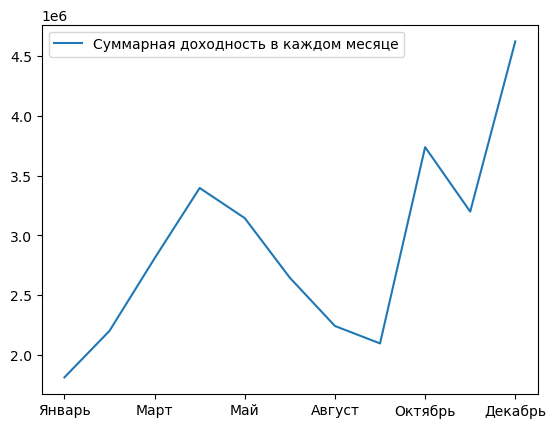

In [294]:
dfinc.plot(column='Суммарная доходность в каждом месяце')

In [ ]:
Самая наибольшая дохожность в декабре и самая наименьшая - в январе

Посчитаем сколько продаж было в каждом городе, и в каком городе наибольшее количество продаж

In [222]:
city_jan=JAN['Purchase Address'].str.split(',').str[1]
city_jan.value_counts()

 San Francisco    2354
 Los Angeles      1529
 New York City    1303
 Boston           1048
 Atlanta           786
 Dallas            785
 Seattle           726
 Portland          623
 Austin            527
Name: Purchase Address, dtype: int64

In [223]:
city_feb=FEB['Purchase Address'].str.split(',').str[1]
city_feb.value_counts()

 San Francisco    2912
 Los Angeles      1901
 New York City    1611
 Boston           1256
 Dallas            981
 Atlanta           936
 Seattle           927
 Portland          836
 Austin            626
Name: Purchase Address, dtype: int64

In [224]:
city_mar=MAR['Purchase Address'].str.split(',').str[1]
city_mar.value_counts()

 San Francisco    3597
 Los Angeles      2456
 New York City    1981
 Boston           1648
 Atlanta          1245
 Dallas           1202
 Seattle          1202
 Portland          983
 Austin            840
Name: Purchase Address, dtype: int64

In [225]:
city_apr=APR['Purchase Address'].str.split(',').str[1]
city_apr.value_counts()

 San Francisco    4437
 Los Angeles      3026
 New York City    2434
 Boston           1918
 Atlanta          1472
 Seattle          1442
 Dallas           1350
 Portland         1237
 Austin            973
Name: Purchase Address, dtype: int64

In [227]:
city_may=MAY['Purchase Address'].str.split(',').str[1]
city_may.value_counts() 

 San Francisco    3921
 Los Angeles      2568
 New York City    2268
 Boston           1800
 Dallas           1420
 Atlanta          1331
 Seattle          1241
 Portland         1166
 Austin            839
Name: Purchase Address, dtype: int64

In [228]:
city_jul=JUL['Purchase Address'].str.split(',').str[1]
city_jul.value_counts()

 San Francisco    3530
 Los Angeles      2235
 New York City    1930
 Boston           1552
 Atlanta          1146
 Seattle          1119
 Dallas           1098
 Portland          919
 Austin            762
Name: Purchase Address, dtype: int64

In [229]:
city_aug=AUG['Purchase Address'].str.split(',').str[1]
city_aug.value_counts()

 San Francisco    2833
 Los Angeles      1867
 New York City    1626
 Boston           1245
 Seattle          1006
 Dallas            968
 Atlanta           941
 Portland          822
 Austin            649
Name: Purchase Address, dtype: int64

In [230]:
city_sep=SEP['Purchase Address'].str.split(',').str[1]
city_sep.value_counts()

 San Francisco    2734
 Los Angeles      1884
 New York City    1536
 Boston           1283
 Seattle           937
 Dallas            935
 Atlanta           915
 Portland          739
 Austin            666
Name: Purchase Address, dtype: int64

In [231]:
city_oct=OCT['Purchase Address'].str.split(',').str[1]
city_oct.value_counts()

 San Francisco    4767
 Los Angeles      3294
 New York City    2648
 Boston           2176
 Seattle          1679
 Dallas           1639
 Atlanta          1605
 Portland         1386
 Austin           1090
Name: Purchase Address, dtype: int64

In [232]:
city_nov=NOV['Purchase Address'].str.split(',').str[1]
city_nov.value_counts()

 San Francisco    4322
 Los Angeles      2750
 New York City    2355
 Boston           1918
 Seattle          1420
 Atlanta          1412
 Dallas           1371
 Portland         1164
 Austin            868
Name: Purchase Address, dtype: int64

In [221]:
city_dec=DEC['Purchase Address'].str.split(',').str[1]
city_dec.value_counts()

 San Francisco    6021
 Los Angeles      3894
 New York City    3408
 Boston           2698
 Dallas           2005
 Atlanta          1988
 Seattle          1977
 Portland         1648
 Austin           1350
Name: Purchase Address, dtype: int64

In [ ]:
Наибольшее количество продаж в San Francisco, наименьшее в Austin 

Найдем суммарный ежемесячный доход, средний доход и стандартное отклонение в каждом месяце для каждого города

In [300]:
df_jan_sum=JAN.groupby(city_jan)['income'].sum() 
df_jan_sum

Purchase Address
 Atlanta          149163.38
 Austin            87587.08
 Boston           199776.55
 Dallas           143465.50
 Los Angeles      287613.86
 New York City    259250.67
 Portland         114832.57
 San Francisco    433103.45
 Seattle          140542.06
Name: income, dtype: float64

In [235]:
df_jan_mean=JAN.groupby(city_jan)['income'].mean()  
df_jan_mean

Purchase Address
 Atlanta          189.775293
 Austin           166.199393
 Boston           190.626479
 Dallas           182.758599
 Los Angeles      188.105860
 New York City    198.964444
 Portland         184.321942
 San Francisco    183.986172
 Seattle          193.584105
Name: income, dtype: float64

In [236]:
df_jan_std=JAN.groupby(city_jan)['income'].std()
df_jan_std

Purchase Address
 Atlanta          326.451937
 Austin           313.053984
 Boston           343.257630
 Dallas           326.543201
 Los Angeles      335.615883
 New York City    357.952698
 Portland         309.522075
 San Francisco    324.201892
 Seattle          316.524320
Name: income, dtype: float64

In [237]:
df_feb_sum=FEB.groupby(city_feb)['income'].sum()
df_feb_sum

Purchase Address
 Atlanta          176566.45
 Austin           108790.39
 Boston           215796.39
 Dallas           184950.05
 Los Angeles      342161.69
 New York City    305396.20
 Portland         149844.84
 San Francisco    548644.98
 Seattle          171330.25
Name: income, dtype: float64

In [238]:
df_feb_mean=FEB.groupby(city_feb)['income'].mean() 
df_feb_mean

Purchase Address
 Atlanta          188.639370
 Austin           173.786565
 Boston           171.812412
 Dallas           188.532161
 Los Angeles      179.990368
 New York City    189.569336
 Portland         179.240239
 San Francisco    188.408304
 Seattle          184.822276
Name: income, dtype: float64

In [239]:
df_feb_std=FEB.groupby(city_feb)['income'].std() 
df_feb_std

Purchase Address
 Atlanta          335.820322
 Austin           318.860589
 Boston           283.376696
 Dallas           324.445058
 Los Angeles      328.941325
 New York City    337.655980
 Portland         315.576075
 San Francisco    335.455338
 Seattle          324.087799
Name: income, dtype: float64

In [240]:
df_mar_sum=MAR.groupby(city_mar)['income'].sum()
df_mar_sum

Purchase Address
 Atlanta          231811.37
 Austin           154546.28
 Boston           301063.55
 Dallas           222976.68
 Los Angeles      429982.33
 New York City    370198.22
 Portland         186815.03
 San Francisco    692157.31
 Seattle          219512.53
Name: income, dtype: float64

In [241]:
df_mar_mean=MAR.groupby(city_mar)['income'].mean()
df_mar_mean

Purchase Address
 Atlanta          186.193871
 Austin           183.983667
 Boston           182.684193
 Dallas           185.504725
 Los Angeles      175.074239
 New York City    186.874417
 Portland         190.045809
 San Francisco    192.426275
 Seattle          182.622737
Name: income, dtype: float64

In [242]:
df_mar_std=MAR.groupby(city_mar)['income'].std()
df_mar_std

Purchase Address
 Atlanta          320.049934
 Austin           334.413686
 Boston           322.877249
 Dallas           326.324481
 Los Angeles      331.043593
 New York City    325.927186
 Portland         364.805914
 San Francisco    337.820721
 Seattle          320.604280
Name: income, dtype: float64

In [243]:
df_apr_sum=APR.groupby(city_apr)['income'].sum()
df_apr_sum

Purchase Address
 Atlanta          284454.92
 Austin           172683.59
 Boston           353880.16
 Dallas           252840.47
 Los Angeles      551399.07
 New York City    446587.78
 Portland         241128.11
 San Francisco    817074.77
 Seattle          276010.24
Name: income, dtype: float64

In [244]:
df_apr_mean=APR.groupby(city_apr)['income'].mean()
df_apr_mean

Purchase Address
 Atlanta          193.243832
 Austin           177.475427
 Boston           184.504776
 Dallas           187.289237
 Los Angeles      182.220446
 New York City    183.478956
 Portland         194.929757
 San Francisco    184.150275
 Seattle          191.407933
Name: income, dtype: float64

In [245]:
df_apr_std=APR.groupby(city_apr)['income'].std()
df_apr_std

Purchase Address
 Atlanta          340.673031
 Austin           308.567529
 Boston           327.080398
 Dallas           332.070367
 Los Angeles      325.759886
 New York City    340.136203
 Portland         344.485049
 San Francisco    333.761000
 Seattle          330.830930
Name: income, dtype: float64

In [246]:
df_may_sum=MAY.groupby(city_may)['income'].sum()
df_may_sum 

Purchase Address
 Atlanta          239262.96
 Austin           160745.21
 Boston           327687.88
 Dallas           266379.49
 Los Angeles      499696.90
 New York City    436418.35
 Portland         230569.97
 San Francisco    772319.75
 Seattle          211504.29
Name: income, dtype: float64

In [247]:
df_may_mean=MAY.groupby(city_may)['income'].mean()
df_may_mean 

Purchase Address
 Atlanta          179.761803
 Austin           191.591430
 Boston           182.048822
 Dallas           187.591190
 Los Angeles      194.586020
 New York City    192.424317
 Portland         197.744400
 San Francisco    196.970097
 Seattle          170.430532
Name: income, dtype: float64

In [248]:
df_may_std=MAY.groupby(city_may)['income'].std()
df_may_std 

Purchase Address
 Atlanta          323.373308
 Austin           351.854395
 Boston           327.217952
 Dallas           357.954316
 Los Angeles      341.276977
 New York City    343.792812
 Portland         352.066901
 San Francisco    353.396905
 Seattle          315.673468
Name: income, dtype: float64

In [249]:
df_jul_sum=JUL.groupby(city_jul)['income'].sum()
df_jul_sum 

Purchase Address
 Atlanta          211766.47
 Austin           150301.03
 Boston           291535.16
 Dallas           210310.23
 Los Angeles      394851.52
 New York City    355623.79
 Portland         177011.79
 San Francisco    642985.78
 Seattle          212513.92
Name: income, dtype: float64

In [250]:
df_jul_mean=JUL.groupby(city_jul)['income'].mean()
df_jul_mean 

Purchase Address
 Atlanta          184.787496
 Austin           197.245446
 Boston           187.844820
 Dallas           191.539372
 Los Angeles      176.667347
 New York City    184.261031
 Portland         192.613482
 San Francisco    182.148946
 Seattle          189.914138
Name: income, dtype: float64

In [251]:
df_jul_std=JUL.groupby(city_jul)['income'].std()
df_jul_std 

Purchase Address
 Atlanta          329.971078
 Austin           357.150146
 Boston           348.463610
 Dallas           343.402946
 Los Angeles      321.568790
 New York City    321.703223
 Portland         324.139787
 San Francisco    331.329345
 Seattle          339.425069
Name: income, dtype: float64

In [252]:
df_aug_sum=AUG.groupby(city_aug)['income'].sum()
df_aug_sum 

Purchase Address
 Atlanta          169267.66
 Austin           125713.61
 Boston           240275.25
 Dallas           179763.46
 Los Angeles      345461.66
 New York City    303157.81
 Portland         152289.69
 San Francisco    538753.13
 Seattle          189730.04
Name: income, dtype: float64

In [253]:
df_aug_mean=AUG.groupby(city_aug)['income'].mean() 
df_aug_mean 

Purchase Address
 Atlanta          179.880616
 Austin           193.703559
 Boston           192.992169
 Dallas           185.706054
 Los Angeles      185.035704
 New York City    186.443918
 Portland         185.267263
 San Francisco    190.170537
 Seattle          188.598449
Name: income, dtype: float64

In [254]:
df_aug_std=JUL.groupby(city_jul)['income'].std()
df_aug_std

Purchase Address
 Atlanta          329.971078
 Austin           357.150146
 Boston           348.463610
 Dallas           343.402946
 Los Angeles      321.568790
 New York City    321.703223
 Portland         324.139787
 San Francisco    331.329345
 Seattle          339.425069
Name: income, dtype: float64

In [255]:
df_sep_sum=SEP.groupby(city_sep)['income'].sum()
df_sep_sum

Purchase Address
 Atlanta          171278.89
 Austin           106610.59
 Boston           247368.73
 Dallas           164215.85
 Los Angeles      354218.42
 New York City    301290.77
 Portland         132949.48
 San Francisco    464529.65
 Seattle          156354.32
Name: income, dtype: float64

In [256]:
df_oct_sum=OCT.groupby(city_oct)['income'].sum()
df_oct_sum

Purchase Address
 Atlanta          306642.99
 Austin           203072.22
 Boston           367328.34
 Dallas           323732.61
 Los Angeles      612445.57
 New York City    486401.39
 Portland         254172.81
 San Francisco    865824.13
 Seattle          317263.99
Name: income, dtype: float64

In [257]:
df_nov_sum=NOV.groupby(city_nov)['income'].sum()
df_nov_sum

Purchase Address
 Atlanta          275378.71
 Austin           171283.48
 Boston           351244.07
 Dallas           248059.13
 Los Angeles      501022.71
 New York City    428480.34
 Portland         207433.82
 San Francisco    764307.63
 Seattle          251699.34
Name: income, dtype: float64

In [258]:
df_dec_sum=DEC.groupby(city_dec)['income'].sum()
df_dec_sum

Purchase Address
 Atlanta           360509.27
 Austin            234277.07
 Boston            510826.06
 Dallas            382384.23
 Los Angeles       683462.92
 New York City     647637.51
 Portland          303863.26
 San Francisco    1108895.82
 Seattle           387440.98
Name: income, dtype: float64

In [259]:
df_sep_mean = SEP.groupby(city_sep)['income'].mean()
df_sep_mean

Purchase Address
 Atlanta          187.190044
 Austin           160.075961
 Boston           192.804934
 Dallas           175.631925
 Los Angeles      188.014023
 New York City    196.152845
 Portland         179.904574
 San Francisco    169.908431
 Seattle          166.866937
Name: income, dtype: float64

In [261]:
df_oct_mean = OCT.groupby(city_oct)['income'].mean()
df_oct_mean

Purchase Address
 Atlanta          191.054822
 Austin           186.304789
 Boston           168.808980
 Dallas           197.518371
 Los Angeles      185.927617
 New York City    183.686326
 Portland         183.385866
 San Francisco    181.628725
 Seattle          188.960089
Name: income, dtype: float64

In [262]:
df_nov_mean = NOV.groupby(city_nov)['income'].mean()
df_nov_mean

Purchase Address
 Atlanta          195.027415
 Austin           197.331198
 Boston           183.130381
 Dallas           180.932991
 Los Angeles      182.190076
 New York City    181.944943
 Portland         178.207749
 San Francisco    176.841192
 Seattle          177.253056
Name: income, dtype: float64

In [263]:
df_dec_mean = DEC.groupby(city_dec)['income'].mean()
df_dec_mean

Purchase Address
 Atlanta          181.342691
 Austin           173.538570
 Boston           189.335085
 Dallas           190.715327
 Los Angeles      175.516929
 New York City    190.034481
 Portland         184.383046
 San Francisco    184.171370
 Seattle          195.974193
Name: income, dtype: float64

In [264]:
df_sep_std = SEP.groupby(city_sep)['income'].std()
df_sep_std 

Purchase Address
 Atlanta          352.757268
 Austin           293.740294
 Boston           355.167535
 Dallas           310.117447
 Los Angeles      338.760627
 New York City    356.112347
 Portland         334.785145
 San Francisco    307.337673
 Seattle          291.148871
Name: income, dtype: float64

In [265]:
df_oct_std = OCT.groupby(city_oct)['income'].std()
df_oct_std 

Purchase Address
 Atlanta          341.842891
 Austin           335.058391
 Boston           314.662758
 Dallas           339.677423
 Los Angeles      342.613371
 New York City    333.874649
 Portland         341.535857
 San Francisco    328.973544
 Seattle          336.352580
Name: income, dtype: float64

In [266]:
df_nov_std = NOV.groupby(city_nov)['income'].std()
df_nov_std

Purchase Address
 Atlanta          362.454227
 Austin           346.482986
 Boston           335.159348
 Dallas           344.579139
 Los Angeles      325.989217
 New York City    328.102027
 Portland         324.441783
 San Francisco    319.667653
 Seattle          310.960112
Name: income, dtype: float64

In [267]:
df_dec_std = DEC.groupby(city_dec)['income'].std()
df_dec_std

Purchase Address
 Atlanta          324.877094
 Austin           306.382171
 Boston           335.679243
 Dallas           338.428672
 Los Angeles      315.914467
 New York City    339.641803
 Portland         342.847611
 San Francisco    336.530881
 Seattle          349.604996
Name: income, dtype: float64